# Nova secção

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.4778 - loss: 1.0599 - val_accuracy: 0.3167 - val_loss: 1.0989
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5104 - loss: 1.0719 - val_accuracy: 0.3333 - val_loss: 1.0786
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.4889 - loss: 1.0308 - val_accuracy: 0.4000 - val_loss: 1.0588
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.4681 - loss: 1.0525 - val_accuracy: 0.4833 - val_loss: 1.0396
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5222 - loss: 1.0010 - val_accuracy: 0.5000 - val_loss: 1.0207
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.5861 - loss: 1.0033 - val_accuracy: 0.5333 - val_loss: 1.0024
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7507 - loss: 0.9409 - val_accuracy: 0.5333 - val_loss: 0.9843
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.6743 - loss: 0.9556 - val_accuracy: 0.5333 - val_loss

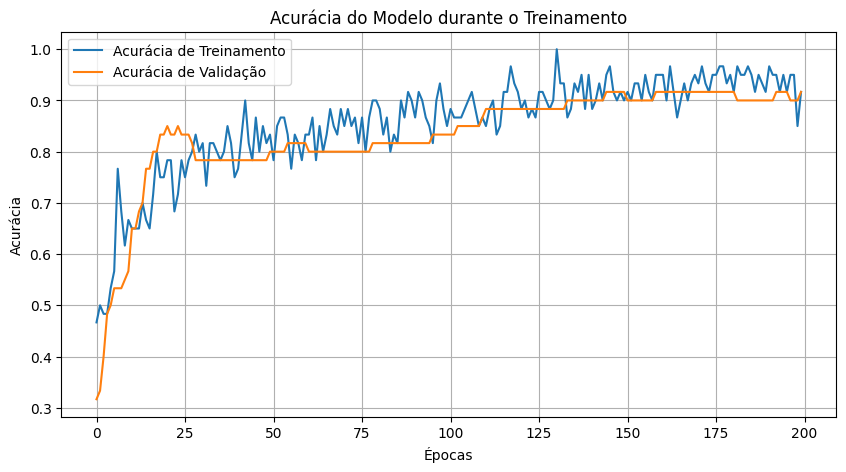

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


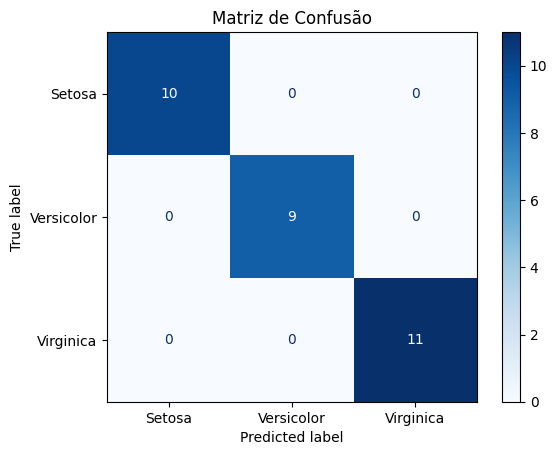

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Melhores Resultados:
     Real  Previsto  Correto
73      1         1     True
18      0         0     True
118     2         2     True
78      1         1     True
76      1         1     True

Piores Resultados:
Empty DataFrame
Columns: [Real, Previsto, Correto]
Index: []


In [19]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

def load_data():
    """
    Carrega e prepara o conjunto de dados Iris.

    Retorna:
        features_train: Conjunto de características para treinamento.
        features_test: Conjunto de características para teste.
        labels_train: Rótulos correspondentes para o conjunto de treinamento.
        labels_test: Rótulos correspondentes para o conjunto de teste.
    """
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    colunas = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
    data = pd.read_csv(url, header=None, names=colunas)

    # Converter as classes em números
    data['species'] = data['species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

    # Separar variáveis independentes e dependentes
    features = data.drop('species', axis=1)
    labels = data['species']

    # Dividir em conjuntos de treinamento e teste
    features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    # Padronizar os dados
    scaler = StandardScaler()
    features_train = scaler.fit_transform(features_train)
    features_test = scaler.transform(features_test)

    return features_train, features_test, labels_train, labels_test

def create_model():
    """
    Cria e retorna um modelo de rede neural.

    Retorna:
        model: Modelo de rede neural criado.
    """
    model = Sequential()
    model.add(Input(shape=(4,)))  # 4 características
    model.add(Dense(32, activation='relu'))  # Camada oculta
    model.add(Dropout(0.5))  # Regularização com Dropout
    model.add(Dense(16, activation='relu'))  # Segunda camada oculta
    model.add(Dense(3, activation='softmax'))  # Camada de saída
    return model

def train_model(model, features_train, labels_train):
    """
    Compila e treina o modelo.

    Parâmetros:
        model: O modelo a ser treinado.
        features_train: Conjunto de características para treinamento.
        labels_train: Rótulos correspondentes para o conjunto de treinamento.

    Retorna:
        history: Histórico do treinamento do modelo.
    """
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
    history = model.fit(features_train, labels_train, epochs=200, validation_split=0.5, callbacks=[early_stopping], verbose=1)
    return history

def plot_accuracy(history):
    """
    Plota a acurácia do modelo durante o treinamento.

    Parâmetros:
        history: Histórico do treinamento do modelo.
    """
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['accuracy'], label='Acurácia de Treinamento')
    plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
    plt.title('Acurácia do Modelo durante o Treinamento')
    plt.xlabel('Épocas')
    plt.ylabel('Acurácia')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_confusion_matrix(model, features_test, labels_test):
    """
    Plota a matriz de confusão para avaliar o desempenho do modelo.

    Parâmetros:
        model: O modelo treinado.
        features_test: Conjunto de características para teste.
        labels_test: Rótulos correspondentes para o conjunto de teste.
    """
    predictions = model.predict(features_test)
    predicted_classes = np.argmax(predictions, axis=1)

    cm = confusion_matrix(labels_test, predicted_classes)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Setosa', 'Versicolor', 'Virginica'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Matriz de Confusão')
    plt.show()

def evaluate_results(model, features_test, labels_test):
    """
    Avalia os resultados do modelo, exibindo as melhores e piores previsões.

    Parâmetros:
        model: O modelo treinado.
        features_test: Conjunto de características para teste.
        labels_test: Rótulos correspondentes para o conjunto de teste.
    """
    predictions = model.predict(features_test)
    predicted_classes = np.argmax(predictions, axis=1)

    # Criar DataFrame para armazenar resultados
    results = pd.DataFrame({
        'Real': labels_test,
        'Previsto': predicted_classes,
        'Correto': labels_test == predicted_classes
    })

    # Tabela com melhores resultados (previsões corretas)
    best_results = results[results['Correto'] == True].head(5)  # 5 melhores
    print("Melhores Resultados:")
    print(best_results)

    # Tabela com piores resultados (previsões incorretas)
    worst_results = results[results['Correto'] == False].head(5)  # 5 piores
    print("\nPiores Resultados:")
    print(worst_results)

if __name__ == "__main__":
    """
    Executa o fluxo principal do projeto: carrega os dados, cria o modelo,
    treina o modelo e plota os resultados.
    """
    features_train, features_test, labels_train, labels_test = load_data()
    model = create_model()
    history = train_model(model, features_train, labels_train)
    plot_accuracy(history)
    plot_confusion_matrix(model, features_test, labels_test)
    evaluate_results(model, features_test, labels_test)  # Avaliar e exibir resultados


In [20]:
git init

SyntaxError: invalid syntax (<ipython-input-20-f188d5ac1197>, line 1)